In [1]:
import pandas as pd
import string
from collections import *
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import collections
import numpy as np
import sys  
from textblob import Blobber
from textblob.en.sentiments import NaiveBayesAnalyzer
import graphlab as gl
reload(sys)  
sys.setdefaultencoding('utf8')

In [2]:
reviews = pd.read_csv('categories/Chinese.txt',sep='\n\n',
                      encoding='utf-8',header=None, engine='python').apply(lambda x: (x[0]).lower(),1).as_matrix().tolist()
with open('dishes.txt') as f:
    dishes = set([(l.strip()) for l in f.readlines()])

In [3]:
counter = Counter()
for dish in dishes:
    for review in reviews:
        if review.find(dish) >= 0:
            counter[dish] += 1

In [4]:
counter.most_common(5)

[('fried rice', 2749),
 ('egg roll', 1490),
 ('orange chicken', 1243),
 ('lunch special', 1229),
 ('egg rolls', 874)]

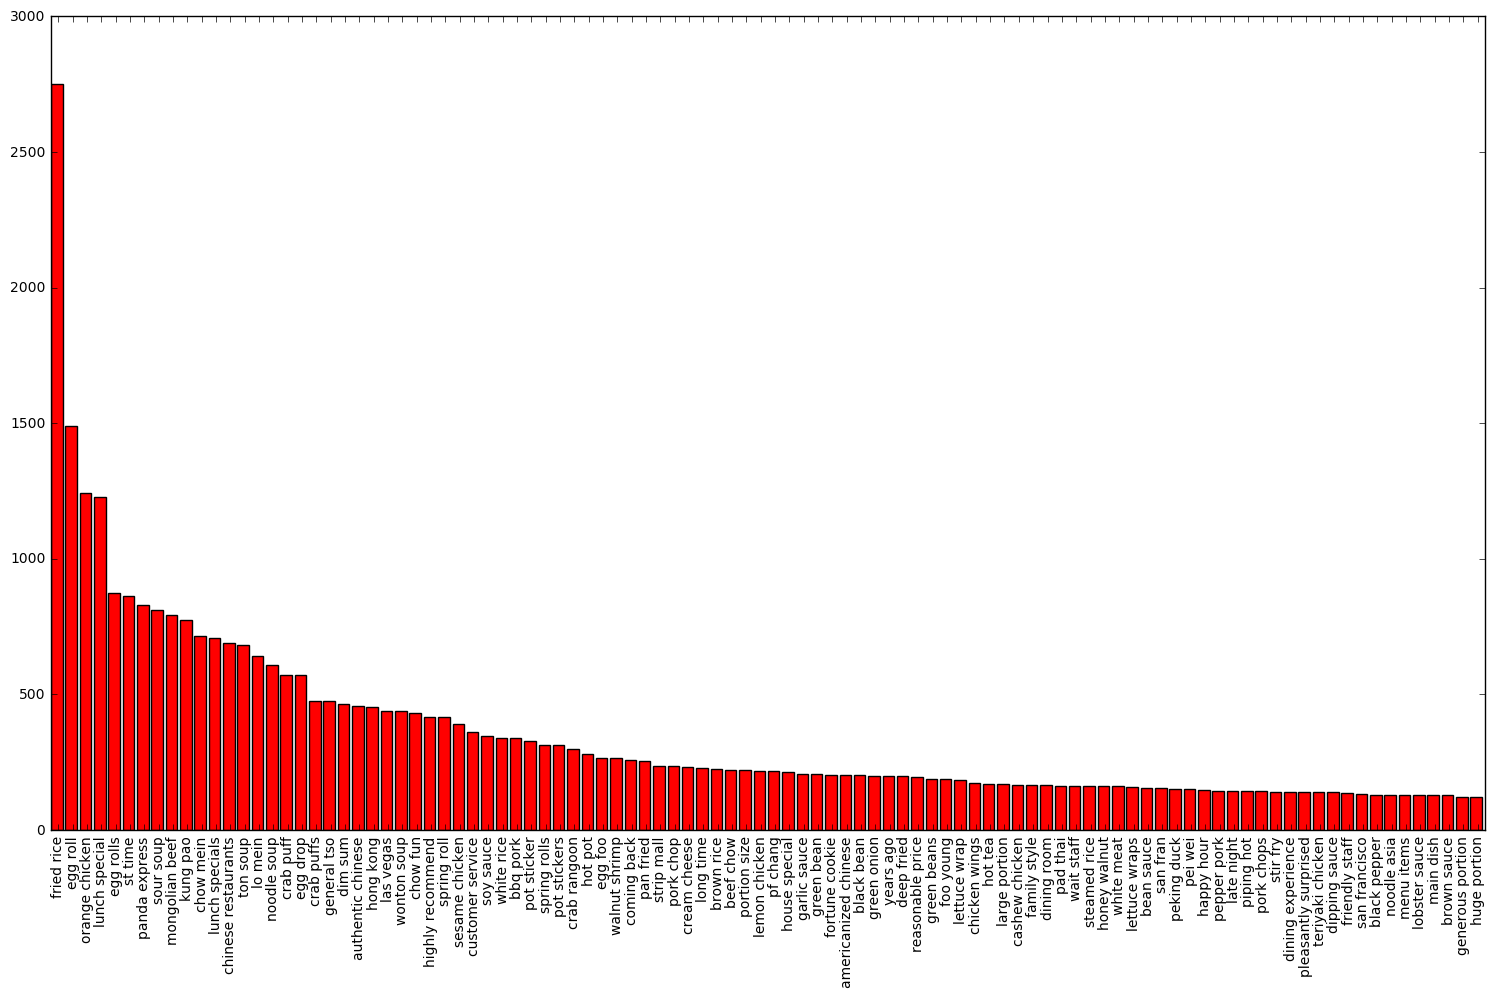

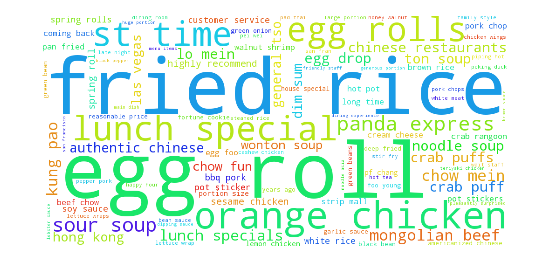

In [5]:
def draw(data,color = 'r'):
    length = len(data)
    ind = np.arange(length)
    width = 0.5
    counts = [c for (names, c) in data]
    fig, ax = plt.subplots()
    bar = ax.bar(ind, counts, color=color)
    plt.xticks(ind + width, [name for (name, c) in data], rotation='vertical') 
    fig.set_size_inches(18.5, 10.5)
    plt.show()
def word_cloud(data):
    wordcloud = WordCloud(width=1000,height=500,background_color='white').generate_from_frequencies(data)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.figure( figsize=(20,10) )

    plt.show()
draw(counter.most_common(100))
word_cloud(counter.most_common(100))

In [6]:
naiveBayesAnalyzer = NaiveBayesAnalyzer()
naiveBayesAnalyzer.train()
blobber = Blobber(analyzer = naiveBayesAnalyzer)

In [7]:
cnt = defaultdict(float)
for review in reviews:
    blob = blobber(review)
    for dish in dishes:
        if review.find(dish) >= 0:
            cnt[dish] += blob.sentiment.p_pos

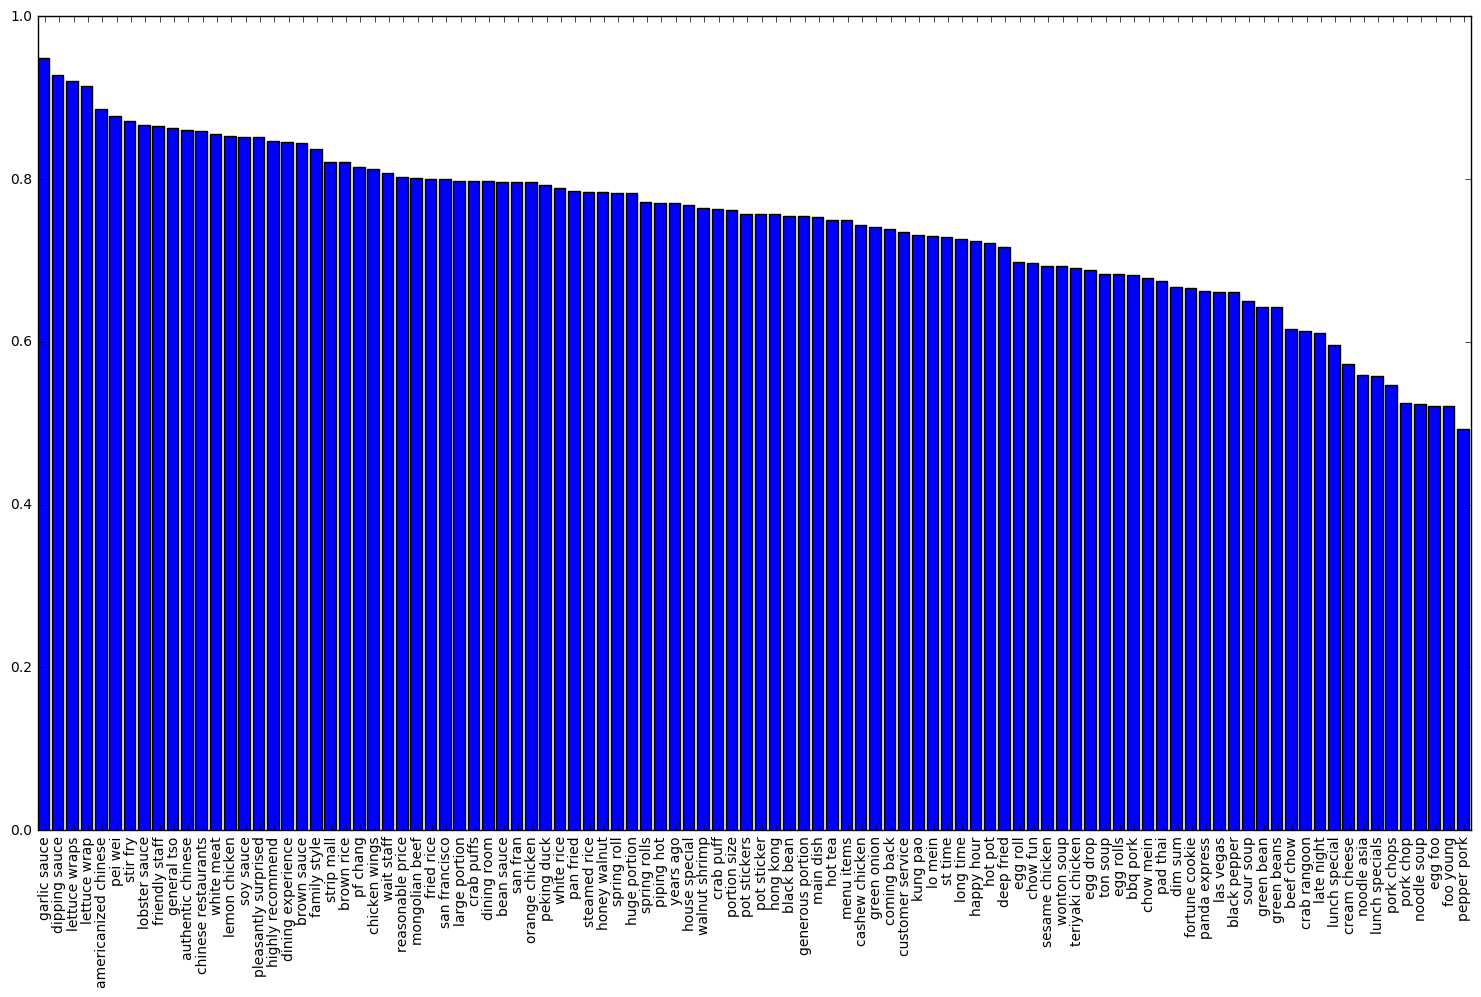

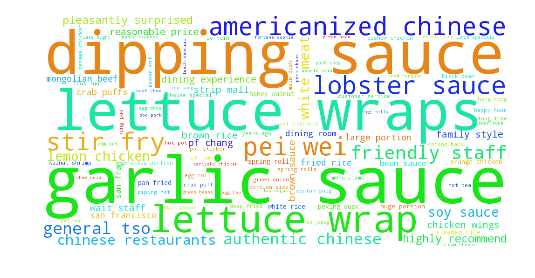

In [8]:
draw(sorted([(key,cnt[key]/value) for key,value in counter.most_common(100)],key=lambda x: -x[1]),'b')
word_cloud((key,cnt[key]/value) for key,value in counter.most_common(100))

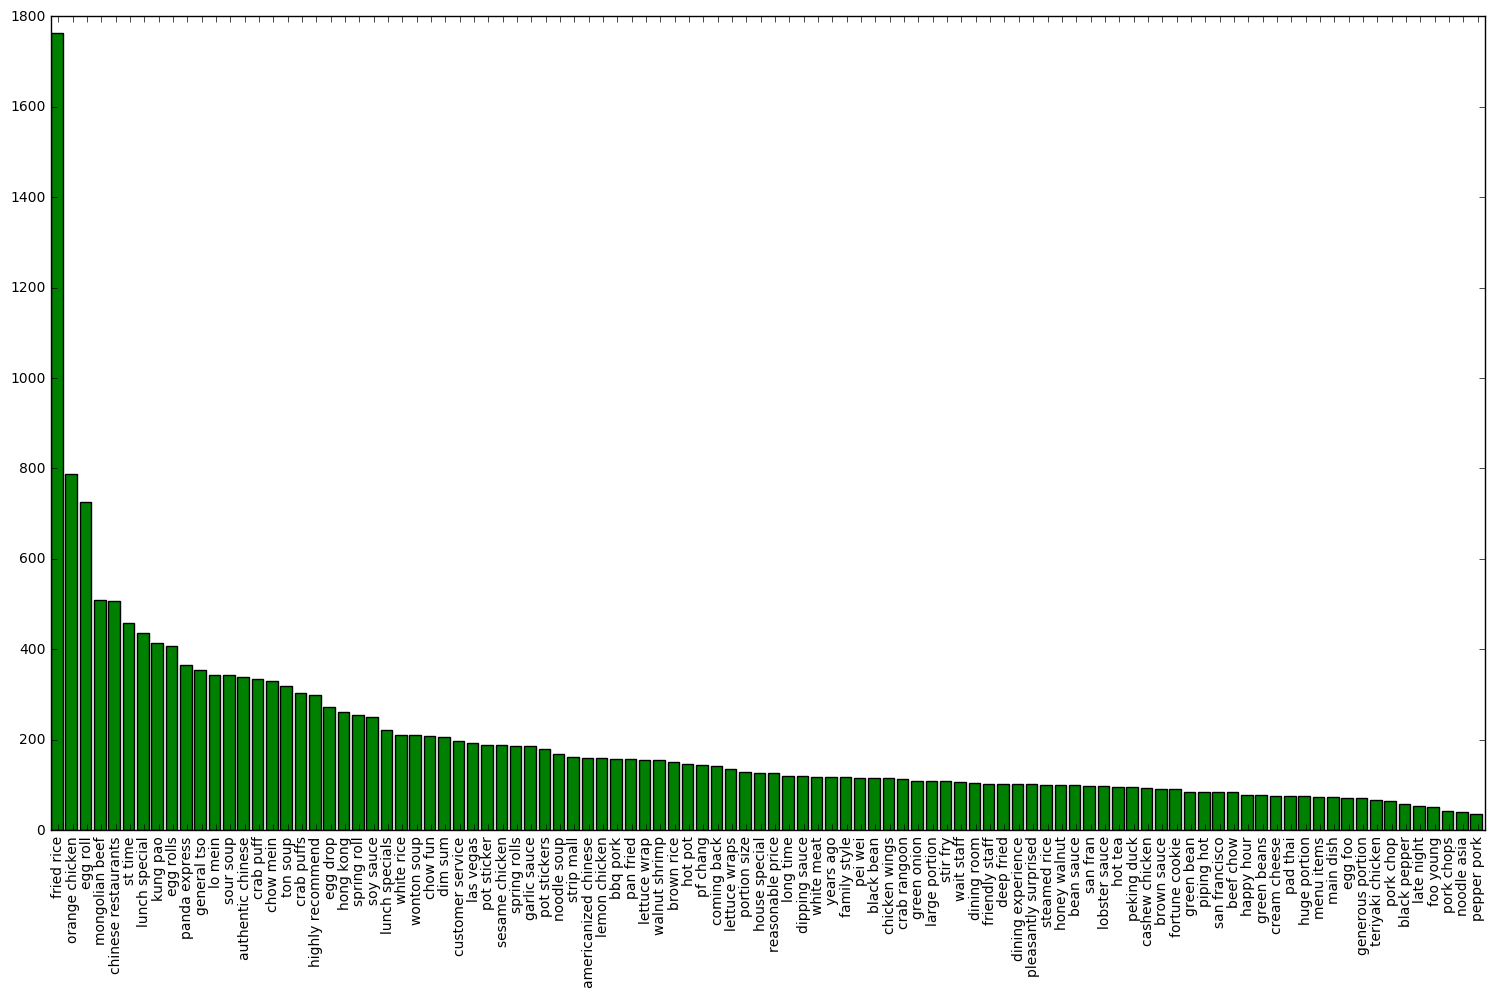

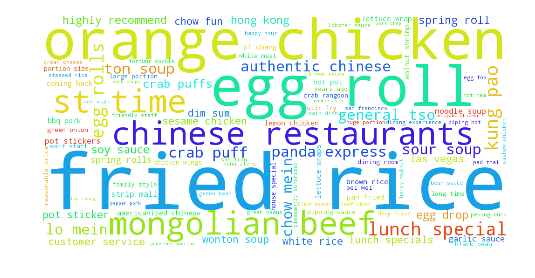

In [9]:
draw(sorted([(key,cnt[key]*(cnt[key]/value)) for key,value in counter.most_common(100)],key=lambda x: -x[1]),'g')
word_cloud([(key,cnt[key]*(cnt[key]/value)) for key,value in counter.most_common(100)])

In [10]:
reviews_df = gl.SFrame.read_json('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json'
                                 ,orient='lines')
business_df = gl.SFrame.read_json('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
                                   ,orient='lines')

Finished parsing file C:\Users\thienbui\Documents\Data\yelp_dataset\yelp_dataset_challenge_academic_dataset\yelp_academic_dataset_review.json

Parsing completed. Parsed 100 lines in 0.288268 secs.

Read 59353 lines. Lines per second: 99744.7

Read 843963 lines. Lines per second: 153217

Finished parsing file C:\Users\thienbui\Documents\Data\yelp_dataset\yelp_dataset_challenge_academic_dataset\yelp_academic_dataset_review.json

Parsing completed. Parsed 1125458 lines in 7.24703 secs.

Finished parsing file C:\Users\thienbui\Documents\Data\yelp_dataset\yelp_dataset_challenge_academic_dataset\yelp_academic_dataset_business.json

Parsing completed. Parsed 100 lines in 0.521883 secs.

Finished parsing file C:\Users\thienbui\Documents\Data\yelp_dataset\yelp_dataset_challenge_academic_dataset\yelp_academic_dataset_business.json

Parsing completed. Parsed 42153 lines in 0.719911 secs.

In [11]:
target = counter.most_common(1)[0][0]

In [12]:
filtered_reviews = reviews_df[reviews_df.apply(lambda x: x['text'].lower().find(target) >= 0)]

In [13]:
business_rating = filtered_reviews.groupby(key_columns='business_id',
                         operations={'Mean Rating': gl.aggregate.MEAN('stars'),'Count':gl.aggregate.COUNT()})

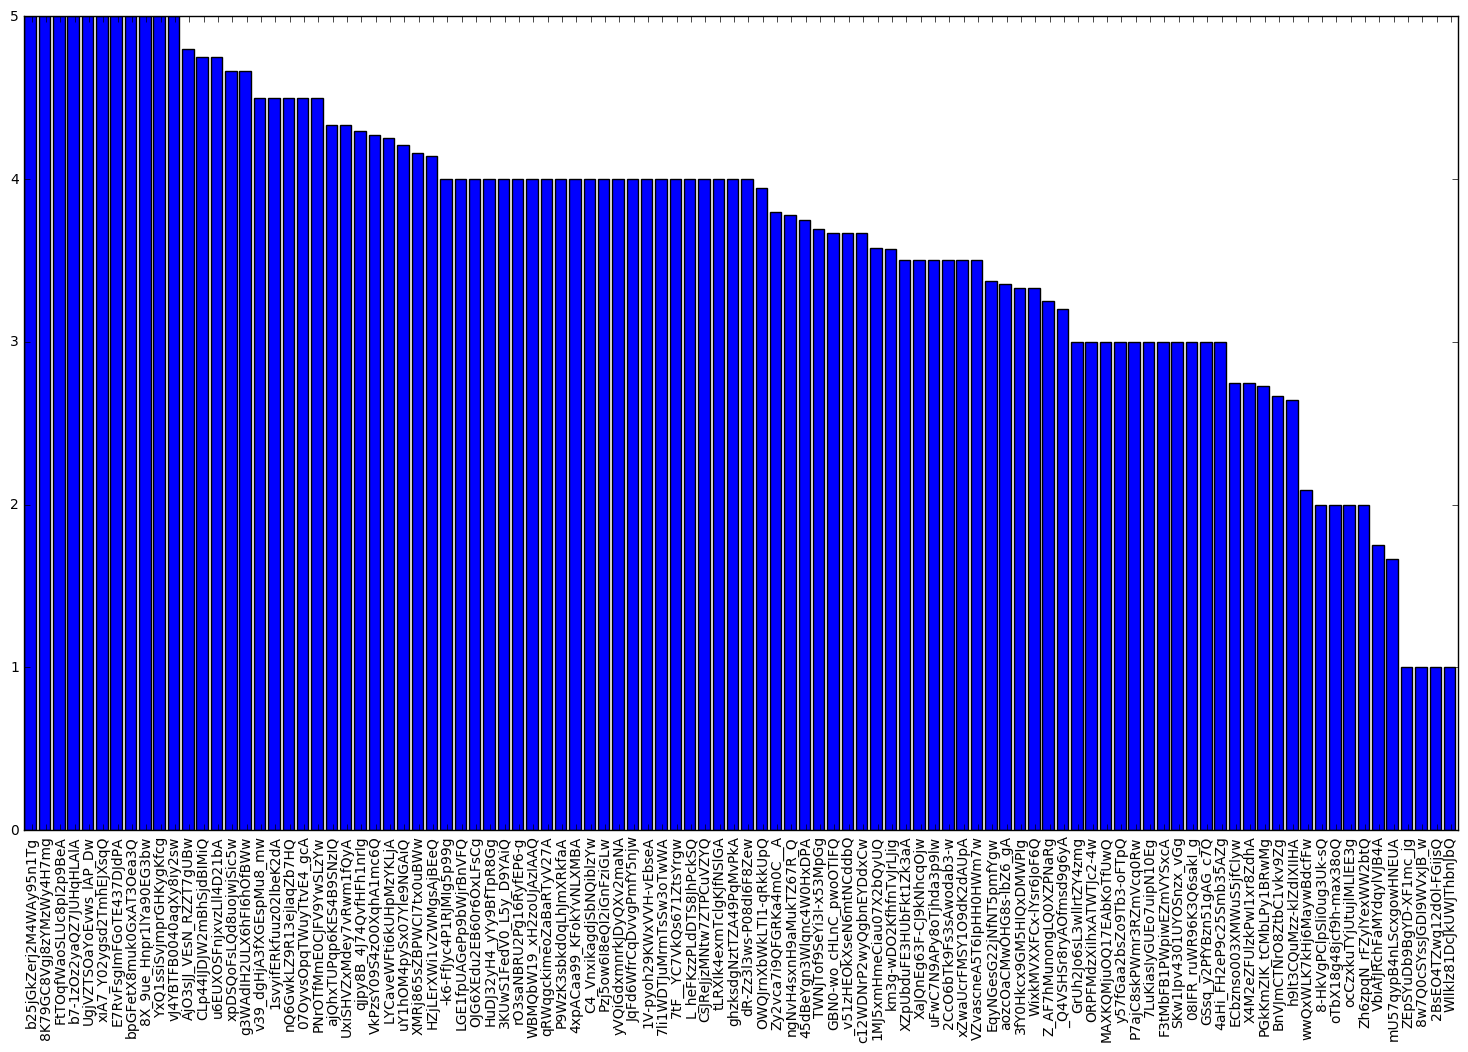

In [14]:
draw(sorted(list(business_rating[['business_id','Mean Rating']].to_numpy().tolist()[0:100]),key=lambda x: -float(x[1])) ,'b')

In [15]:
business_rating = business_rating[business_rating['Count']>25]

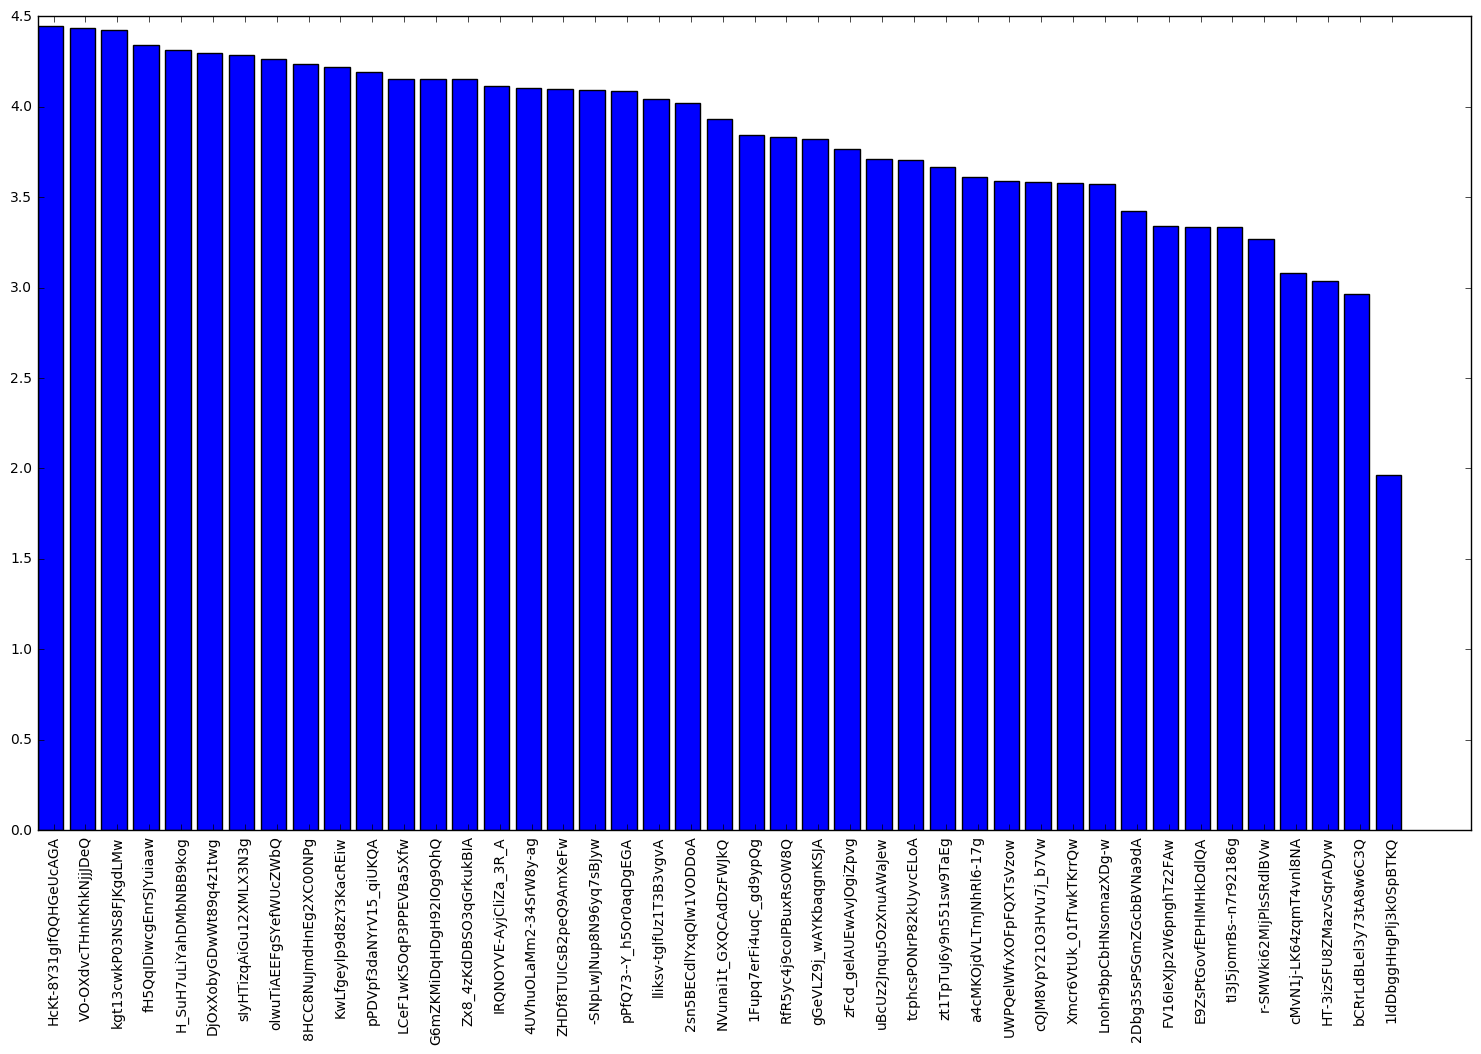

In [16]:
best_res = sorted(list(business_rating[['business_id','Mean Rating']].to_numpy().tolist()),key=lambda x: -float(x[1]))
draw(best_res ,'b')

In [17]:
best_choice = business_df[business_df['business_id'] == best_res[0][0]]

In [18]:
best_choice[0]['name']

'Rice Trax Teriyaki Grill'

In [19]:
best_choice[0]['full_address']

'7780 S Jones Blvd\nSouthwest\nLas Vegas, NV 89139'